**Name** |  DUPAYA & SANTIAGO<br>
**Section** | CPE32S3<BR>
**Date Performed**: | 2/3/2024<BR>
**Date Submitted**: | 2/3/2024<BR>
**Instructor**: | Engr. Roman M. Richard

####Choose any dataset applicable for classification and/or prediction analysis problems.<br>
####Show the application of the following algorithms:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


sl = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
sl.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
sl["Gender"] = sl["Gender"].apply(lambda toLabel: 0 if toLabel == 'Female' else 1)
label_mapping = {'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
sl["Sleep Disorder"] = sl["Sleep Disorder"].map(label_mapping)

#**Linear Regression**

**Singular LR**


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sl[['Sleep Duration']], sl['Quality of Sleep'], test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Making predictions on the test set
y_prediction = LR.predict(X_test)

# Calculating the prediction score (R-squared)
prediction_score = LR.score(X_test, y_test)

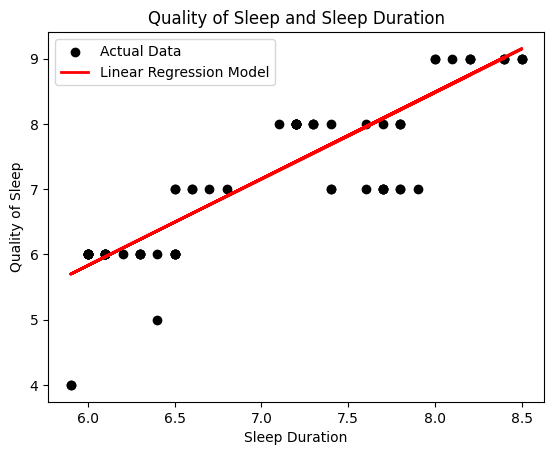

Prediction Score (R-squared): 0.764858440650139


In [ ]:
# Plotting the scatter plot and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_prediction, color='red', linewidth=2, label='Linear Regression Model')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.legend()
plt.title('Quality of Sleep and Sleep Duration')
plt.show()

# Outputting the prediction score
print("Prediction Score (R-squared):", prediction_score)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating additional evaluation metrics
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

# Outputting the evaluation metrics
print("Prediction Score (R-squared):", prediction_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Prediction Score (R-squared): 0.764858440650139
Mean Absolute Error (MAE): 0.4426173769495453
Mean Squared Error (MSE): 0.3547397818031859
Root Mean Squared Error (RMSE): 0.5956003540992785


**Evaluation Report:**

The LR evaluation report breaks down a few key metrics. The R-squared value, at 0.7648, which means that about 76.48% of the ups and downs of Sleep Quality which can be explained by Sleep Duration. Therefore, our model seems to capture a good value of the variation from Sleep Quality. MAE, suggest that the average gap between our predicted model and the target, is around 0.4426 for Sleep Quality. Which suggests or indicating that the correlation are closer to the actual values. The MSE, averaging the squared gaps, scores about 0.3547. which indicates that our model goes hard on bigger errors. RMSE, which is the square root of MSE, is around 0.5956, indicating that, on average, our model's guesses stray by around 0.5956 units, indicating that smaller values mean our predictions are good.

**Multiple LR**

In [ ]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 38.1+ KB


In [ ]:
# Data preparation
X_multi = sl[['Gender', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Sleep Disorder']]
y_multi = sl['Quality of Sleep']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=44)

# Creating and fitting the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae_multi = mean_absolute_error(y_test, y_pred)
mse_multi = mean_squared_error(y_test, y_pred)
rmse_multi = np.sqrt(mse_multi)

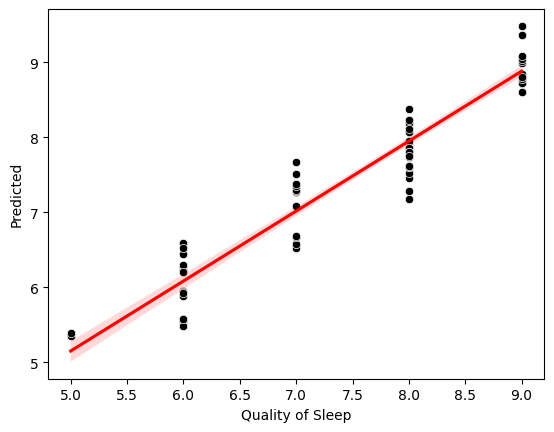

In [ ]:
# Plotting Prediction vs Actual
sns.scatterplot(x=y_test, y=y_pred, color='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')

sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

In [ ]:
# Outputting evaluation metrics
print('Mean Absolute Error (Multi):', mae_multi)
print('Mean Squared Error (Multi):', mse_multi)
print('Root Mean Squared Error (Multi):', rmse_multi)

Mean Absolute Error (Multi): 0.272796754147999
Mean Squared Error (Multi): 0.09844175327146765
Root Mean Squared Error (Multi): 0.31375428805271754


**Evaluation Report:**

The Mean Absolute Error is scored around 0.2728, which means that the average, of our predictions deviate around 0.2728 units to the actual values, suggeting that smaller Mean Absolute Error values, indicates that our model's predictions are quite closely correlated. The Mean Squared Error is scored around 0.0984. It indicates that it's producing larger errors more, in which our model is handling well. The Root Mean Squared Error scored around 0.3138 is only the square root of Mean Squared Error, showing a more interpretable measure. This suggests that, on average, our model's predictions deviate by around 0.3138 units from the actual values. Overall our output in all, the scores indicate that our multiple linear regression model is somewhat can predict the quality of sleep over on various features.

**Polynomial LR**

In [ ]:
# Data preparation
Xpoly = sl[['Sleep Duration']]
ypoly = sl['Quality of Sleep']
degree = 2

# Polynomial regression pipeline
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
pipeline.fit(Xpoly, ypoly)
y_pred_poly = pipeline.predict(Xpoly)

# Sort the values for a smoother plot
sort_order = np.argsort(Xpoly.values.flatten())

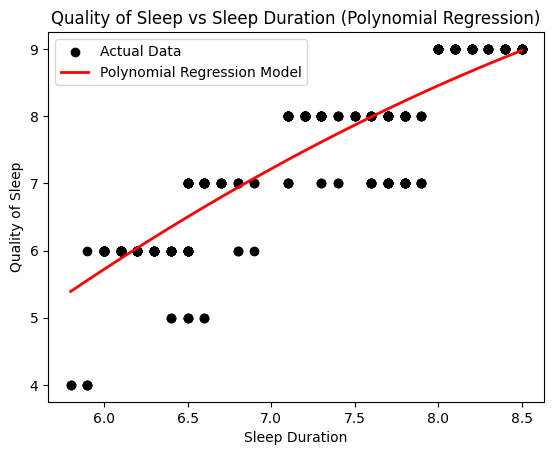

In [ ]:
# Plotting the scatter plot and polynomial regression line
plt.scatter(Xpoly, ypoly, color='black', label='Actual Data')
plt.plot(Xpoly.iloc[sort_order], y_pred_poly[sort_order], color='red', linewidth=2, label='Polynomial Regression Model')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.legend()
plt.title('Quality of Sleep vs Sleep Duration (Polynomial Regression)')
plt.show()

In [ ]:
mae_poly = mean_absolute_error(ypoly, y_pred_poly)
mse_poly = mean_squared_error(ypoly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Outputting the evaluation metrics
print("Mean Absolute Error (Poly):", mae_poly)
print("Mean Squared Error (Poly):", mse_poly)
print("Root Mean Squared Error (Poly):", rmse_poly)

Mean Absolute Error (Poly): 0.4284034718176318
Mean Squared Error (Poly): 0.30958083146959925
Root Mean Squared Error (Poly): 0.5563998844981901


**Evaluation Report:**

Our polynomial linear regression model, exhibits a moderate predictive performance, Where The Mean Absolute Error that is approximately 0.4284 indicates that, the model's sleep quality predictions deviate by this amount from the actual values. While the Mean Squared Error scored at 0.3096 suggests a fair level of accuracy, and with the Root Mean Squared Error of 0.5564 highlights a slightly larger overall variance in prediction errors.

Logistic Regression



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Define predictor variables and response variable
X_logistic = sl[['Sleep Duration', 'Stress Level', 'Age', 'Physical Activity Level', 'Heart Rate']]
y_logistic = sl['Gender']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=0)

# Instantiate the logistic regression model
log_regression = LogisticRegression()

# Fit the model using the training data
log_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Define metrics
y_pred_proba = log_regression.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Print the AUC value
print("Area Under the Curve (AUC):", auc)

Area Under the Curve (AUC): 0.9470365699873897


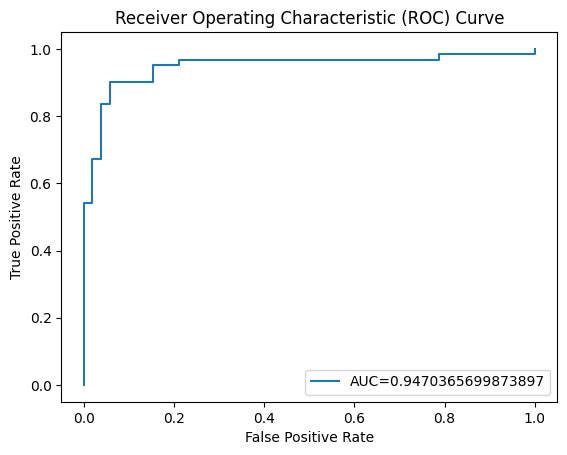

In [ ]:
# Create ROC curve
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

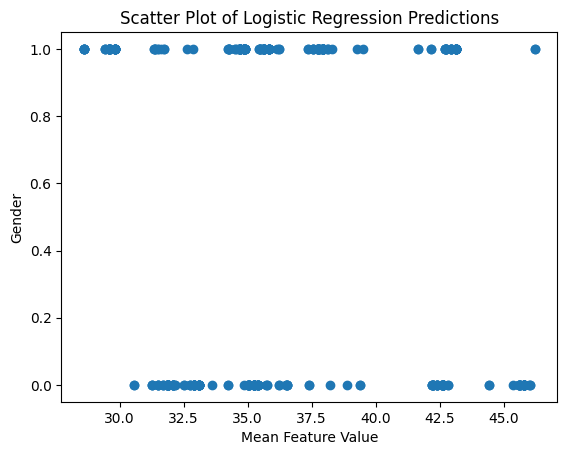

In [ ]:
# Display scatter plot for visualizing predictions
sl_logic = sl[['Sleep Duration', 'Stress Level', 'Age', 'Physical Activity Level', 'Heart Rate']].mean(axis=1)
plt.scatter(sl_logic, y_logistic)
plt.xlabel('Mean Feature Value')
plt.ylabel('Gender')
plt.title('Scatter Plot of Logistic Regression Predictions')
plt.show()

**Evaluation Report:**

The logistic regression model shows a strong score, as indicated by the Area Under the Curve value of around 0.947. This value suggests that the model effectively distinguishes between different genders based on features such as sleep duration, stress level, age, physical activity level, and heart rate.

Decision Tree


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import os
from six import StringIO
from sklearn.tree import export_text

In [ ]:
sl.head(500)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,2
370,371,0,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,2
371,372,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,2
372,373,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,2


In [ ]:
# Prepare the data
Y_decision = sl["Quality of Sleep"].values
columns = ["Sleep Duration", "Age", "Stress Level"]
X_decision = sl[list(columns)].values

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_decision, Y_decision, test_size=0.3, random_state=0)

In [ ]:
# Create and train the decision tree classifier
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train.fit(X_train, Y_train)

# Evaluate the model on the training set
train_accuracy = clf_train.score(X_train, Y_train)
train_accuracy

0.9348659003831418

In [ ]:
# Generate a textual representation of the decision tree
tree_rules = export_text(clf_train, feature_names=columns)

# Output the decision tree rules
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Sleep Duration <= 7.00
|   |--- Sleep Duration <= 6.35
|   |   |--- Sleep Duration <= 5.95
|   |   |   |--- class: 4
|   |   |--- Sleep Duration >  5.95
|   |   |   |--- class: 6
|   |--- Sleep Duration >  6.35
|   |   |--- Stress Level <= 6.50
|   |   |   |--- class: 7
|   |   |--- Stress Level >  6.50
|   |   |   |--- class: 6
|--- Sleep Duration >  7.00
|   |--- Sleep Duration <= 7.95
|   |   |--- Stress Level <= 5.50
|   |   |   |--- class: 8
|   |   |--- Stress Level >  5.50
|   |   |   |--- class: 7
|   |--- Sleep Duration >  7.95
|   |   |--- class: 9



In [ ]:
# Evaluate the model on the testing set
Y_pred = clf_train.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)

# Output the evaluation metrics
print("\nModel Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Model Evaluation:
Training Accuracy: 0.9348659003831418
Testing Accuracy: 0.9469026548672567


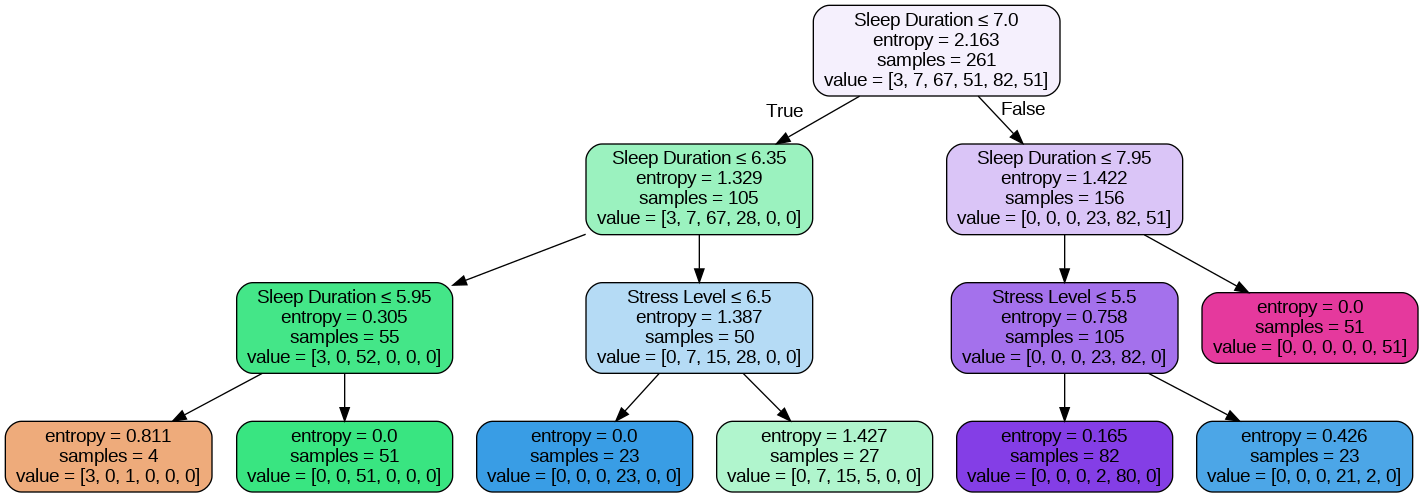

In [ ]:
# Display the decision tree graph
dot_data = StringIO()
tree.export_graphviz(clf_train, out_file=dot_data, feature_names=columns, filled=True, rounded=True, special_characters=True)

with open("sl.dot", 'w') as f:
    f.write(dot_data.getvalue())

# Convert .dot to .png using Graphviz
os.system("dot -Tpng sl.dot -o sl.png")

# Display the decision tree image
image_path = os.path.abspath("sl.png")
display(Image(filename=image_path))

**Evaluation Report:**

based on the output presenation of our decision tree we see that sleep duration is splited between less than equal to 7 and more than 7 which that if your sleep duration is more than the value it is less likely tht you are stress compare to the less than value.


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import os
import pydotplus

In [ ]:
# Prepare the data
Y_random = sl["Quality of Sleep"].values
X_random = sl[columns].values

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_random, Y_random, test_size=0.3, random_state=30)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=52, max_depth=3, class_weight='balanced', random_state=30)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=52,
                       random_state=30)

In [ ]:
# Evaluate the model on the training set
train_accuracy = rf_classifier.score(X_train, Y_train)

# Evaluate the model on the testing set
Y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': columns, 'Importance': rf_classifier.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Output the evaluation metrics
print("\nRandom Forest Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Feature Importance:
          Feature  Importance
0  Sleep Duration    0.389255
1             Age    0.309100
2    Stress Level    0.301645

Random Forest Model Evaluation:
Training Accuracy: 0.9693486590038314
Testing Accuracy: 0.9557522123893806

Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       0.94      1.00      0.97        31
           7       1.00      0.81      0.89        26
           8       0.93      1.00      0.96        37
           9       1.00      1.00      1.00        14

    accuracy                           0.96       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.96      0.96      0.95       113


Confusion Matrix:
[[ 2  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 31  0  0  0]
 [ 0  0  2 21  3  0]
 [ 0  0  0  0 37  0]
 [ 0  0  0  0  0 14]]


In [ ]:
# Save the decision trees of the first estimator as an image
with open("rf_tree.dot", 'w') as f:
    f = export_graphviz(rf_classifier.estimators_[0], out_file=f, feature_names=columns, filled=True, rounded=True, special_characters=True)

# Convert .dot to .png using Graphviz
os.system("dot -Tpng rf_tree.dot -o rf_tree.png")

0

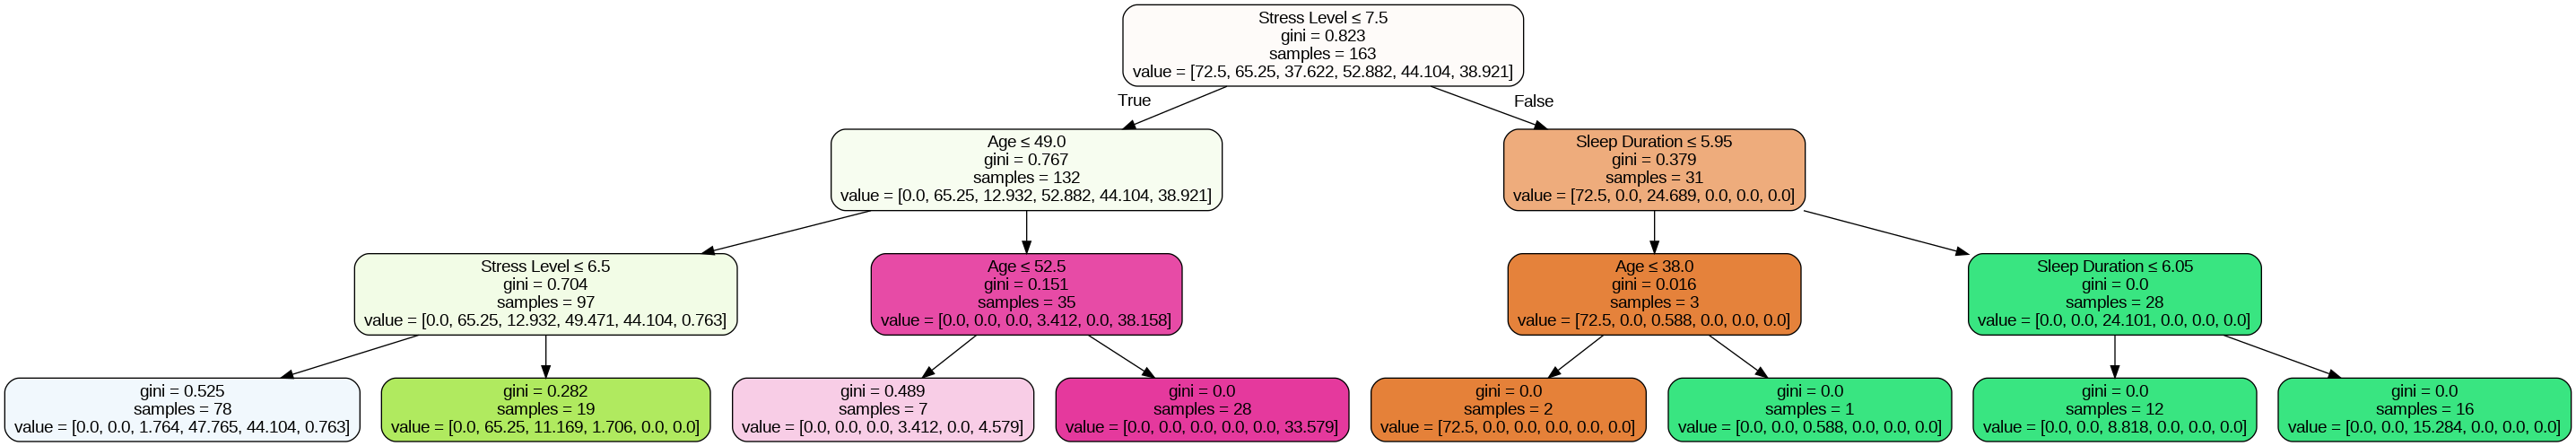

In [ ]:
# Display the decision tree image
image_path = os.path.abspath("rf_tree.png")
display(Image(filename=image_path))

**Evaluation Report:**

The model's output reveals that sleep quality depends on features of Sleep Duration, Age, and Stress Level. The Training Accuracy score of 0.9693 shows strong performance on the trained data. Additionally, the Testing Accuracy of 0.9557 indicates good performance on new data. Overall, the model achieves high accuracy and generalizes well. Key factors influencing decisions include Sleep Duration, Age, and Stress Level. While the model excels for most classes, but there may be challenges with class 7, suggested by a lower recall.